# Практикум 3 курс. Осень 2022 - Весна 2023. Задание 1
Авторы:
- Семенов Данила 312
- Глазков Даниил 312
- Москалев Артем 312

# Код задания
## Часть 1

Для начала подключим все необходимы библиотеки

In [108]:
import numpy as np
from scipy.optimize import linprog

Реализуем nash_equilibrium(a), которая принимает
матрицу выигрыша и возвращает значение игры и оптимальные стратегии первого и
второго игроков. 

![](matrix_img.jpg)

Данное фото позволяет увидеть как задачу о назождении максимума можно привести к задаче нахождения минимума

In [109]:
def nash_equilibrium(a):
    # Размерность матрицы выигрыша
    m, n = a.shape
    
    # Матрица для нахождения оптимальных стратегий
    c = [-1] * m

    # Решение задачи линейного программирования
    result = linprog(c, A_ub=a, b_ub=[1] * n)

    # Вычисление значения игры
    game_value = 1 / np.sum(result.x)

    # Определение оптимальных стратегий первого игрока
    strategy_first = game_value * result.x

    # Матрица для нахождения оптимальных стратегий второго игрока
    c = [1] * m
    
    # Решение задачи линейного программирования для второго игрока
    result = linprog(c, A_ub=-a.T, b_ub=[-1] * n)

    # Определение оптимальных стратегий второго игрока
    strategy_second = game_value * result.x

    # Приведем np.Series к List для более удобного написания тестов
    strategy_second = list(strategy_second)
    strategy_first = list(strategy_first)

    return game_value, strategy_first, strategy_second

# Часть 2 (Тесты)

Теперь осталось проверить наш алгоритм на входных данных, использую библиотеку для тестирования.

Для начала составим необходимы входные данные

## Тест 1

In [122]:
M_0 = np.array(
    [[4, 0, 6, 2, 2, 1],
     [3, 8, 4, 10, 4, 4],
     [1, 2, 6, 5, 0, 0],
     [6, 6, 4, 4, 10, 3],
     [10, 4, 6, 4, 0, 9],
     [10, 7, 0, 7, 9, 8]]
)

#### Выходные данные
- значение игры: 151/31 = 4,8709677419
- стратегия первого игрока: (0, 0, 257/372, 9/62, 55/372, 1/62) = (0; 0; 0,6908602151; 0,1451612903; 0,1478494624; 0,01612903226)
- стратегия второго игрока: (0, 4/31, 3/31, 27/62, 21/62, 0) = (0; 0,1290322581; 0,09677419355; 0,435483871; 0,3387096774; 0)

## Тест 2
Игра, в которой спектр оптимальной стратегии состоит из одной точки (т.е. существует равновесие Нэша в чистых стратегиях)

In [111]:
M_3 = np.array(
    [[3, 9, 2, 1],
    [7, 8, 5, 6],
    [4, 7, 3, 5],
    [5, 6, 1, 7]]
)

## Тест 3
Игра, в которой спектр оптимальной стратегии не полон

In [112]:
M_4 = np.array(
    [[2, 1, 2, 3], 
    [3, 1.5, 1, 2], 
    [2, 2, 1, 1],
    [1, 1, 1, 0.5]]
)

## Тест 4
Игра, в которой спектр оптимальной стратегии полон

In [113]:
M_5 = np.array(
    [[4, 7, 2], 
    [7, 3, 2], 
    [2, 1, 8]]
) 

# Напишем юнит тесты для нашей функции

Для написания тестов будем использовать библиотеку *unittest*

In [114]:
import unittest

In [123]:
class TestMatrixGame(unittest.TestCase):
    def test_gameValue(self):
        self.assertAlmostEqual(nash_equilibrium(M_0)[0], 4.870967741935485)

    def test_strategy_first(self):
        self.assertTrue(np.allclose(
            nash_equilibrium(M_0)[1], np.array([0, 4 / 31, 3 / 31, 27 / 62, 21 / 62, 0]))
        )

    def test_strategy_second(self):
        self.assertTrue(np.allclose(
            nash_equilibrium(M_0)[2], np.array([0, 0, 257/372, 9/62, 55/372, 1/62]))
        )

In [125]:
# Executing the tests in the above test case class
unittest.main(argv=['first-arg-is-ignored'], exit=False)

.FF
FAIL: test_strategy_first (__main__.TestMatrixGame)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/var/folders/z0/nzn_4nj93yj7hx8fvvsgr4pw0000gn/T/ipykernel_4718/3777608999.py", line 6, in test_strategy_first
    self.assertTrue(np.allclose(
AssertionError: False is not true

FAIL: test_strategy_second (__main__.TestMatrixGame)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/var/folders/z0/nzn_4nj93yj7hx8fvvsgr4pw0000gn/T/ipykernel_4718/3777608999.py", line 11, in test_strategy_second
    self.assertTrue(np.allclose(
AssertionError: False is not true

----------------------------------------------------------------------
Ran 3 tests in 0.032s

FAILED (failures=2)


# Визуализация результатов

Для этого используем библиотеки matplotlib и numpy

In [117]:
import matplotlib.pyplot as plt
import numpy as np

In [118]:
def graf(a, player):
    plt.figure()
    # Добавление на рисунок области отображения 
    for i in range(len(a)):
        plt.scatter(i+1, a[i])
    if player == 1:
        plt.title("\nOptimal strategy for 1nd player\n")
    elif player == 2:
        plt.title("\nOptimal strategy for 2nd player\n")
    plt.grid(True)   # линии вспомогательной сетки

## Реализация теста 2 (равновесие Нэша)

V: 4.999999999999999
P: [0.0, 0.0, 1.0, 0.0]
Q: [0.0, 0.9999999999999999, 0.0, 0.0]


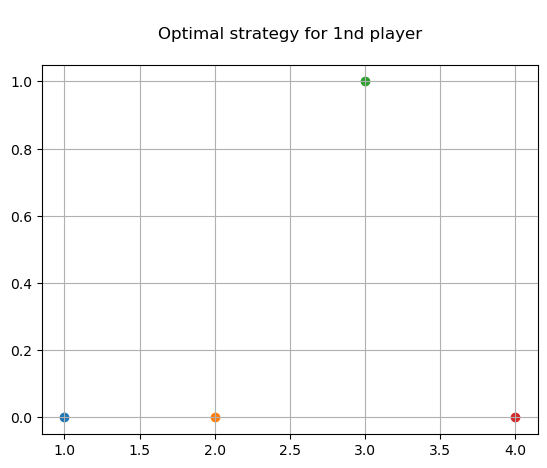

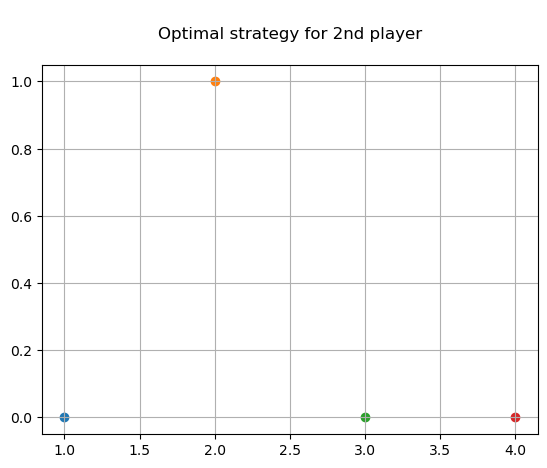

In [126]:
v, p, q = nash_equilibrium(M_3)
print(f'V: {v}\nP: {p}\nQ: {q}')
graf(p, 1)
graf(q, 2)
plt.show()

## Реализация теста 3 (спектр оптимальной стратегии не полон)

P.s. некоторые чистые стратегии не используются

V: 1.4999999999999998
P: [0.0, 0.5, 0.4999999999999999, 0.0]
Q: [0.5000000000000001, 0.0, 0.49999999999999983, 0.0]


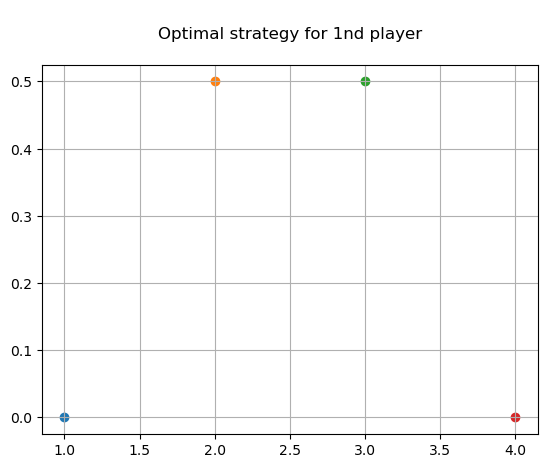

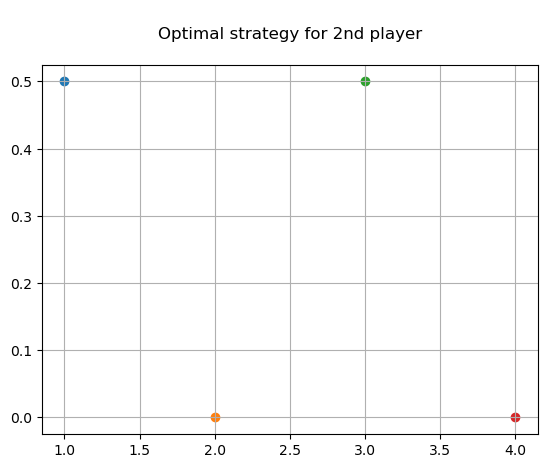

In [120]:
v, p, q = nash_equilibrium(M_4)
print(f'V: {v}\nP: {p}\nQ: {q}')
graf(p, 1)
graf(q, 2)
plt.show()

## Реализация теста 4 (спектр оптимальной стратегии полон)

V: 4.029411764705882
P: [0.3529411764705882, 0.2647058823529412, 0.3823529411764707]
Q: [0.4264705882352941, 0.23529411764705885, 0.3382352941176471]


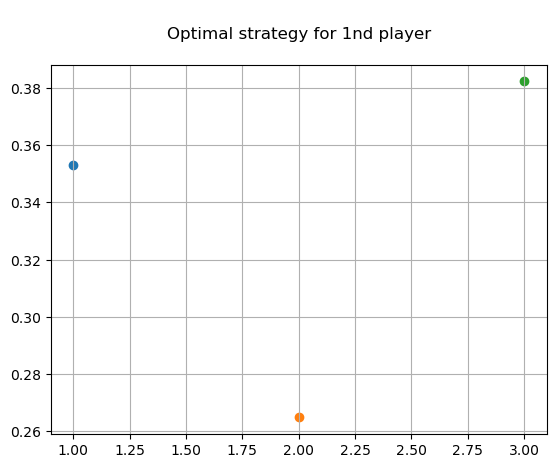

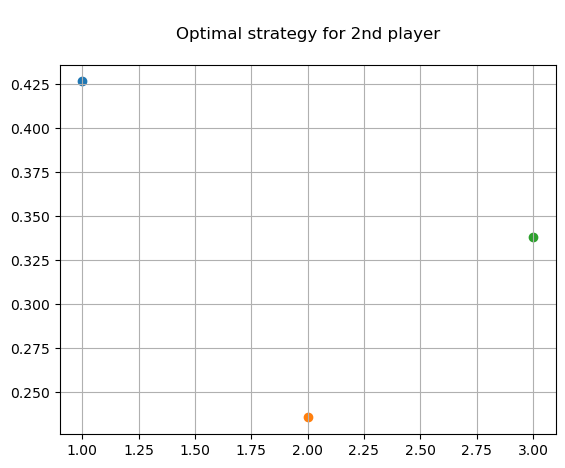

In [121]:
v, p, q = nash_equilibrium(M_5)
print(f'V: {v}\nP: {p}\nQ: {q}')
graf(p, 1)
graf(q, 2)
plt.show()